In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.metrics import accuracy_score

## Training and Testing

In [16]:
df= pd.read_csv('TORONTO/Processed_MFCCS_Old.csv')
X= df.iloc[:, 1:131]
y= df.iloc[:, 131]
div= np.random.rand(len(df)) < 0.9
X_train= X[div]
X_test= X[~div]
y_train= y[div]
y_test= y[~div]


X_train= np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [17]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predicted_labels = model.predict(X_test)
acc= accuracy_score(y_test, predicted_labels) * 100
acc

90.625

## Live Data Test

In [15]:
import librosa
import librosa.display

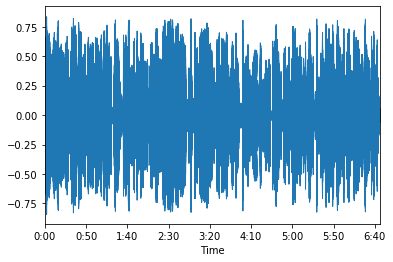

In [25]:
X, sampling_rate = librosa.load('Test/large_test.wav', res_type='kaiser_fast', sr=22050*2, offset=0.5)
temp= []
for i in range(0, X.shape[0]//(44100)):
    temp.append(X[44100*i:44100*(i+1)])
temp= np.array(temp)
librosa.display.waveplot(X, sr=sampling_rate)
plt.show()

In [26]:
featurelive=[]
sample_rate = np.array(sampling_rate)
for i in range(0, temp.shape[0]):
    mfccs = np.mean(librosa.feature.mfcc(y=temp[i], sr=sample_rate, n_mfcc=13),axis=0)
    l= mfccs.tolist()
    for j in range(0, 130-len(mfccs)):
        l.append(0)
    mfccs= np.array(l)
    featurelive.append(mfccs[:])
livedf2 = featurelive
livepreds= model.predict(livedf2)
# for i in range(livepreds.shape[0]):
#     feel_val[livepreds[i]]+=1
livepreds

array(['angry', 'angry', 'angry', 'angry', 'angry', 'fear', 'fear',
       'fear', 'fear', 'angry', 'angry', 'angry', 'fear', 'angry',
       'angry', 'fear', 'angry', 'angry', 'angry', 'fear', 'fear',
       'angry', 'angry', 'fear', 'angry', 'angry', 'fear', 'fear',
       'angry', 'fear', 'angry', 'angry', 'fear', 'fear', 'fear', 'fear',
       'fear', 'fear', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'fear', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'fear', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'angry', 'fear', 'angry', 'angry', 'fear', 'fear', 'fear',
       'angry', 'fear', 'angry', 'fear', 'fear', 'angry', 'angry', 'fear',
       'angry', 'fear', 'fear', 'angry', 'angry', 'fear', 'fear', 'angry',
       'angry', 'angry', 'fear', 'angry', 'fear', 'fear', 'fear', 'fear',
       'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear',
       'fear', 'fear', 'angry', 'angry', 'fear', 'fear', 'fear', 'fear',
       '